# Muhammad Usman 
Task 1 Predicting student's score based on the no. of study hours

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Display some Statistical information
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

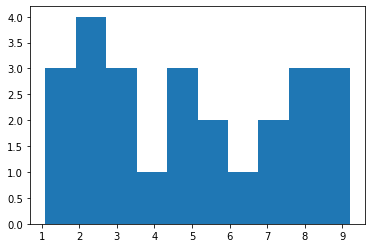

In [4]:
plt.hist(data['Hours'])

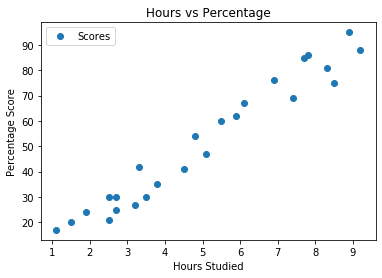

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Preparing the data**


In [15]:
X = data[['Hours']].values
y= data[['Scores']].values


In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2) 

In [17]:
X_train.shape, y_test.shape

((20, 1), (5, 1))

In [18]:
# initialize instance from LinearRegression as regressor

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [19]:
# Evaluate model performance
 
cof = regressor.score(X_test, y_test)

# Mean Squared Error
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
MSE = mean_squared_error(y_pred, y_test)

print(f'Coefficient of Score: {cof}\n Mean Squared Error: {MSE}')



Coefficient of Score: 0.9256442861032819
 Mean Squared Error: 39.63456973550669


In [20]:
# Find the model Coefficient and Intercept
inter = regressor.intercept_
coef = regressor.coef_

# construct the model formula
y_hat = inter + coef*X

Text(0, 0.5, "Student's Score")

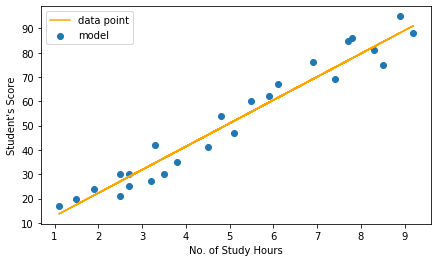

In [21]:


plt.figure(figsize=(7,4))
plt.scatter(X,y)
plt.plot(X,y_hat,c='orange')
plt.legend(['data point','model'])
plt.xlabel('No. of Study Hours')
plt.ylabel("Student's Score")



In [22]:
# Predict student's score with 9.25 hours of study 
pred = regressor.predict(np.array(9.25,ndmin=2))
print(f"No. of study hours: 9.25\nPredicted Score is: {round(pred[0][0],2)} ")

No. of study hours: 9.25
Predicted Score is: 91.58 


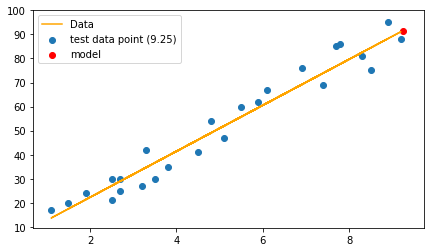

In [23]:
# final result

plt.figure(figsize=(7,4))
plt.scatter(X,y)
plt.scatter(9.25,pred,c='red')
plt.plot(X,y_hat,c='orange')
plt.legend(['Data','test data point (9.25)','model'])
plt.yticks([10,20,30,40,50,60,70,80,90,100])
plt.show()
